In [1]:
using CSV, DataFrames, Plots, StatsPlots, Statistics

In [2]:
filelist = [ f for f in split.(read(`ls ../results/penalty`, String), "\n") if endswith(f, ".csv")]

581-element Array{SubString{String},1}:
 "0_summary.csv"    
 "arrhythmia_1.csv" 
 "arrhythmia_10.csv"
 "arrhythmia_11.csv"
 "arrhythmia_12.csv"
 "arrhythmia_13.csv"
 "arrhythmia_14.csv"
 "arrhythmia_15.csv"
 "arrhythmia_16.csv"
 "arrhythmia_17.csv"
 "arrhythmia_18.csv"
 "arrhythmia_19.csv"
 "arrhythmia_2.csv" 
 ⋮                  
 "wiki4he_17.csv"   
 "wiki4he_18.csv"   
 "wiki4he_19.csv"   
 "wiki4he_2.csv"    
 "wiki4he_20.csv"   
 "wiki4he_3.csv"    
 "wiki4he_4.csv"    
 "wiki4he_5.csv"    
 "wiki4he_6.csv"    
 "wiki4he_7.csv"    
 "wiki4he_8.csv"    
 "wiki4he_9.csv"    

In [7]:
df = DataFrame(CSV.read("../results/penalty/"*filelist[2]))

,dataset,copynum,penalty,iter,method,osr2
,String,Int64,Int64,Int64,String,Float64
1,arrhythmia,1,1,1,Impute then regress,0.732565
2,arrhythmia,1,1,1,Augmented,0.737821
3,arrhythmia,1,1,1,Augmented Affine,0.473888
4,arrhythmia,1,1,2,Impute then regress,0.579107
5,arrhythmia,1,1,2,Augmented,0.595991
6,arrhythmia,1,1,2,Augmented Affine,0.516769
7,arrhythmia,1,1,3,Impute then regress,0.618577
8,arrhythmia,1,1,3,Augmented,0.616224
9,arrhythmia,1,1,3,Augmented Affine,0.519494


In [8]:
for i in 3:length(filelist)
    aux = DataFrame(CSV.read("../results/penalty/"*filelist[i]))
    df = vcat(df, aux)
end

In [9]:
function iqr(t)
    try
        return quantile(t, .75) - quantile(t, .25)
    catch 
        return NaN
    end
end

iqr (generic function with 1 method)

In [10]:
res = aggregate(df[[:dataset, :method, :penalty, :osr2]], [:dataset, :method, :penalty], [mean, median, std, iqr])

┌ Warning: `getindex(df::DataFrame, col_inds::Union{AbstractVector, Regex, Not})` is deprecated, use `df[:, col_inds]` instead.
│   caller = top-level scope at In[10]:1
└ @ Core In[10]:1


,dataset,method,penalty,osr2_mean,osr2_median,osr2_std,osr2_iqr
,String,String,Int64,Float64,Float64,Float64,Float64
1,arrhythmia,Impute then regress,1,0.667003,0.688808,0.0920527,0.129508
2,arrhythmia,Augmented,1,0.666707,0.681174,0.0897578,0.13073
3,arrhythmia,Augmented Affine,1,0.616666,0.635948,0.106831,0.175588
4,arrhythmia,Impute then regress,2,0.646488,0.66658,0.10756,0.12657
5,arrhythmia,Augmented,2,0.653442,0.675221,0.1084,0.124608
6,arrhythmia,Augmented Affine,2,0.637703,0.660247,0.112666,0.133499
7,arrhythmia,Impute then regress,4,0.645257,0.653642,0.0938727,0.104884
8,arrhythmia,Augmented,4,0.642565,0.650977,0.102102,0.106282
9,arrhythmia,Augmented Affine,4,0.638652,0.650979,0.100457,0.112411


In [7]:
CSV.write("../results/penalty/0_summary.csv", res)

"../results/penalty/0_summary.csv"

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[15]:1
└ @ Core In[15]:1


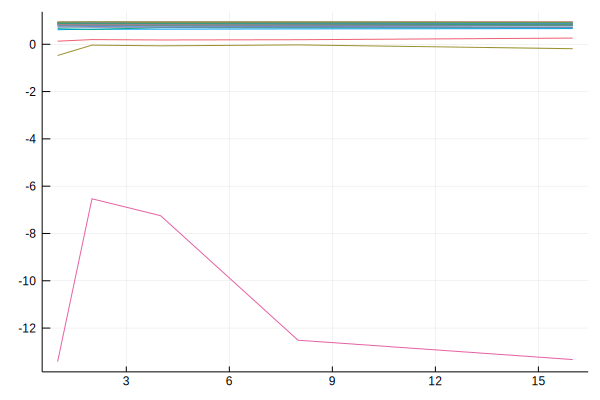

In [15]:
@df res[res[:method] .== "Augmented Affine",:] plot(:penalty, :osr2_mean, group=:dataset, legend=:none)

In [13]:
res[res[:dataset] .== "thyroid-disease-thyroid-0387",:]

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[13]:1
└ @ Core In[13]:1


,dataset,method,penalty,osr2_mean,osr2_median
,String,String,Int64,Float64,Float64
1,thyroid-disease-thyroid-0387,Impute then regress,1,0.66574,0.717828
2,thyroid-disease-thyroid-0387,Augmented,1,0.642265,0.679988
3,thyroid-disease-thyroid-0387,Augmented Affine,1,-13.4206,0.350267
4,thyroid-disease-thyroid-0387,Impute then regress,2,0.710687,0.763248
5,thyroid-disease-thyroid-0387,Augmented,2,0.637956,0.676212
6,thyroid-disease-thyroid-0387,Augmented Affine,2,-6.53374,0.442185
7,thyroid-disease-thyroid-0387,Impute then regress,4,0.692675,0.73867
8,thyroid-disease-thyroid-0387,Augmented,4,0.62797,0.668773
9,thyroid-disease-thyroid-0387,Augmented Affine,4,-7.24947,0.483422


In [15]:
unique(res[:penalty])

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[15]:1
└ @ Core In[15]:1


5-element Array{Int64,1}:
  1
  2
  4
  8
 16